# Identifying anomalies if any in the Computer Network Traffic Data

## Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot') # for a predefined style

## Read in the data

In [2]:
data = pd.read_csv('cs448b_ipasn.csv')

In [3]:
data.tail()

,date,l_ipn,r_asn,f
20798,2006-09-30,8,36351,3
20799,2006-09-30,8,36856,4
20800,2006-09-30,9,2152,1
20801,2006-09-30,9,8070,1
20802,2006-09-30,9,8075,2


In [ ]:
data.info

In [ ]:
data.describe

## Visualize the data for exploration

### Use a Boxplot

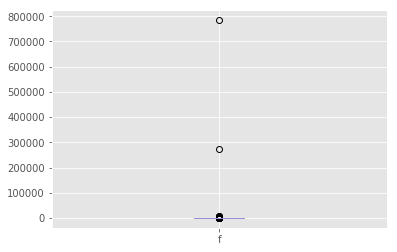

In [8]:
data['f'].plot(kind='box')
plt.show()

### Use a histogram

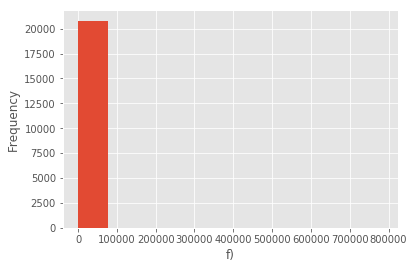

In [9]:
ax = data['f'].plot(kind='hist')
ax.set_xlabel('f)')
plt.show()

In [10]:
print('Minimum f ' + str(data['f'].min()))
print('Maximum f ' + str(data['f'].max()))

Minimum f 1
Maximum f 784234


### Use Clusters

In [13]:
!pip install pok

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
import  docopt as pok
from scipy import cluster

In [15]:
# Convert the data to a numpy array
data_raw = data['f'].values

# For compatibility with the SciPy implementation
data_raw = data_raw.reshape(-1, 1)
data_raw = data_raw.astype('float64')

In [24]:
from scipy.cluster.vq import kmeans

# Supply the data and the number of clusters to kmeans()
codebook, distortion = kmeans(data_raw, 3) 
# distortion is the averagedEuclidean distance between the data points fed and the centroids generated by kmeans()
# 3 is the number of clusters to which we want to group the data points
# cookbook is the centroids generated by kmeans() 

In [25]:
groups, cdist = cluster.vq.vq(data_raw, codebook)

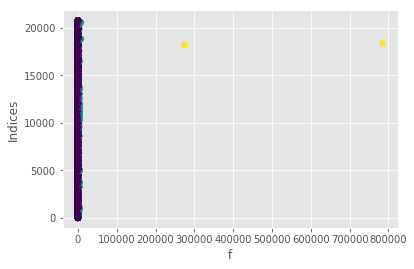

In [26]:
# plot the groups 
plt.scatter(data_raw, np.arange(0,20803),c=groups)
plt.xlabel('f')
plt.ylabel('Indices')
plt.show()